# L3: Image generation app 🎨

UPDATED: Jon Chun, 4 Oct 2024
* Run locally rather than call remote HF API endpoints
* Must store HF_TOKEN in Colab secrets before running

Load your HF API key and relevant Python libraries

In [1]:
from google.colab import userdata
HF_API_KEY = userdata.get('HF_TOKEN')

In [2]:
import os

os.environ["HF_API_KEY"] = HF_API_KEY

In [3]:
import os
import io
import IPython.display
from PIL import Image
import base64

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
# hf_api_key = os.environ['HF_API_KEY']

In [8]:
!pip install diffusers
!pip install transformers scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 45.1 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

from IPython.display import display

In [9]:
# Load the text-to-image model locally using Hugging Face's diffusers pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "stabilityai/stable-diffusion-2-1-base"

# Initialize the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

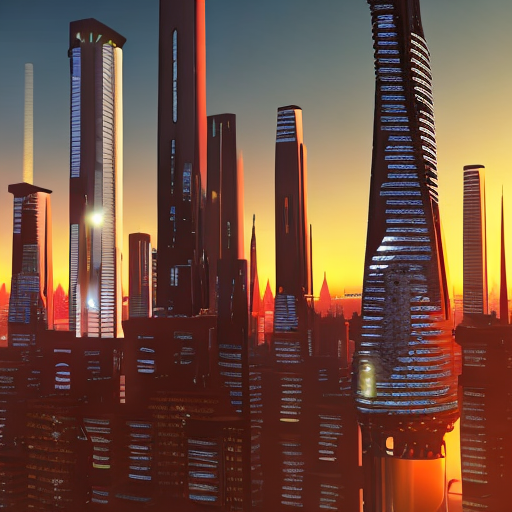

In [11]:
# Text-to-image generation function
def text_to_image(input_text):
    # Generate the image using the model
    generated_image = pipe(input_text).images[0]

    # Return the generated image
    return generated_image

# Example usage
input_text = "A futuristic city skyline at sunset"
generated_image = text_to_image(input_text)

# Save the generated image to a file
generated_image.save("image_generated.jpg")

# Display the generated image in Colab
display(generated_image)


  0%|          | 0/50 [00:00<?, ?it/s]

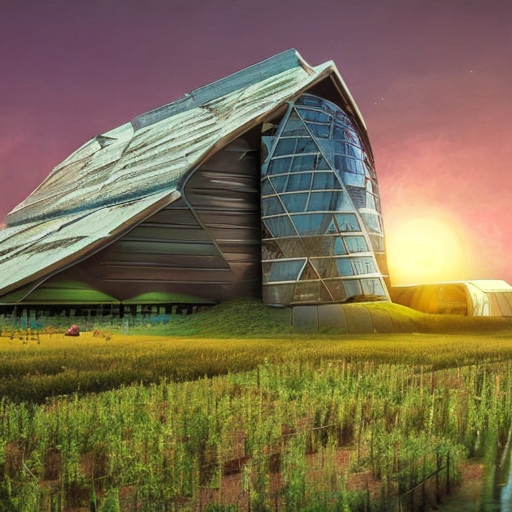

In [14]:
# Helper function for text-to-image generation
def get_completion(inputs, parameters=None):
    # Generate the image using the local model pipeline
    generated_image = pipe(inputs).images[0]

    # Save the generated image to a file
    generated_image.save("image_generated.jpg")

    # Return the generated image
    return generated_image

# Example usage
input_text = "A futuristic rustic farm at sunset"
generated_image = get_completion(input_text)

# Display the generated image in Colab
display(generated_image)  # Use IPython's display function


## Building an image generation app

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.

## Generating with `gr.Interface()`

In [17]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.3 MB/s eta 0:00:00


In [20]:
# Image generation function
def generate(prompt):
    # Generate the image using the local Stable Diffusion model
    result_image = pipe(prompt).images[0]

    # Return the generated image (no need for base64 conversion)
    return result_image

# Create the Gradio interface
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna", "a mecha robot in a favela"])

# Launch the Gradio app (no need to specify the port)
demo.launch(share=True)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b1943687921f59d6ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [21]:
demo.close()

Closing server running on port: 7861


## Building a more advanced interface

In [34]:
# Image generation function
def generate(prompt, negative_prompt, steps, guidance, width, height):
    # Define the parameters for Stable Diffusion
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }

    # Generate the image using the local Stable Diffusion model
    generated_image = pipe(prompt,
                           negative_prompt=params["negative_prompt"],
                           num_inference_steps=params["num_inference_steps"],
                           guidance_scale=params["guidance_scale"],
                           width=params["width"],
                           height=params["height"]
                          ).images[0]

    return generated_image

# Create the Gradio interface
demo = gr.Interface(
    fn=generate,
    inputs=[
        gr.Textbox(label="Your prompt"),
        gr.Textbox(label="Negative prompt"),
        gr.Slider(1, 100, value=50, label="Steps"),
        gr.Slider(1, 20, value=7.5, label="Guidance scale"),
        gr.Slider(256, 1024, value=512, label="Width"),
        gr.Slider(256, 1024, value=512, label="Height")
    ],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate images with advanced parameters using Stable Diffusion",
    allow_flagging="never"
)

# Launch the Gradio app
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://77aaacee9fe60e2110.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [33]:
import gradio as gr

#A helper function to convert the PIL image to base64
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }

    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image

#### gr.Slider()
- You can set the `minimum`, `maximum`, and starting `value` for a `gr.Slider()`.
- If you want the slider to increment by integer values, you can set `step=1`.

In [26]:
import gradio as gr
from diffusers import StableDiffusionPipeline
import torch

# Load the text-to-image model locally using Hugging Face's diffusers pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "stabilityai/stable-diffusion-2-1-base"

# Initialize the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

# Image generation function
def generate(prompt, negative_prompt, steps, guidance, width, height):
    # Generate the image using the local Stable Diffusion model
    generated_image = pipe(prompt,
                           negative_prompt=negative_prompt,
                           num_inference_steps=steps,
                           guidance_scale=guidance,
                           width=width,
                           height=height).images[0]

    return generated_image

# Create the Gradio interface
demo = gr.Interface(
    fn=generate,
    inputs=[
        gr.Textbox(label="Your prompt"),
        gr.Textbox(label="Negative prompt"),
        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                  info="In how many steps will the denoiser denoise the image?"),
        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                  info="Controls how much the text prompt influences the result"),
        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
    ],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate any image with Stable Diffusion",
    allow_flagging="never"
)

# Launch the Gradio app in Colab (share=True enables external access)
demo.launch(share=True)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://80d18d5f61663765f9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [27]:
demo.close()

Closing server running on port: 7861


## `gr.Blocks()`

- Within `gr.Blocks()`, you can define multiple `gr.Row()`s, or multiple `gr.Column()`s.
- Note that if the jupyter notebook is very narrow, the layout may change to better display the objects.  If you define two columns but don't see the two columns in the app, try expanding the width of your web browser, and the screen containing this jupyter notebook.

- When using `gr.Blocks()`, you'll need to explicitly define the "Submit" button using `gr.Button()`, whereas the 'Clear' and 'Submit' buttons are automatically added when using `gr.Interface()`.

In [29]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True) # , server_port=int(os.environ['PORT3']))

Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f564b4562f389122e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [30]:
demo.close()

Closing server running on port: 7860


#### scale

- To choose how much relative width to give to each column, set the `scale` parameter of each `gr.Column()`.  
- If one column has `scale=4` and the second column has `scale=1`, then the first column takes up 4/5 of the total width, and the second column takes up 1/5 of the total width.

#### gr.Accordion()
- The `gr.Accordion()` can show/hide  the app options with a mouse click.
- Set `open=True` to show the contents of the Accordion by default, or `False` to hide it by default.

In [31]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True) # , server_port=int(os.environ['PORT4']))

Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5f107466d566780d9f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [32]:
gr.close_all()

Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7860
